# Ethique et responsabilité jeu de donné

<Axes: >

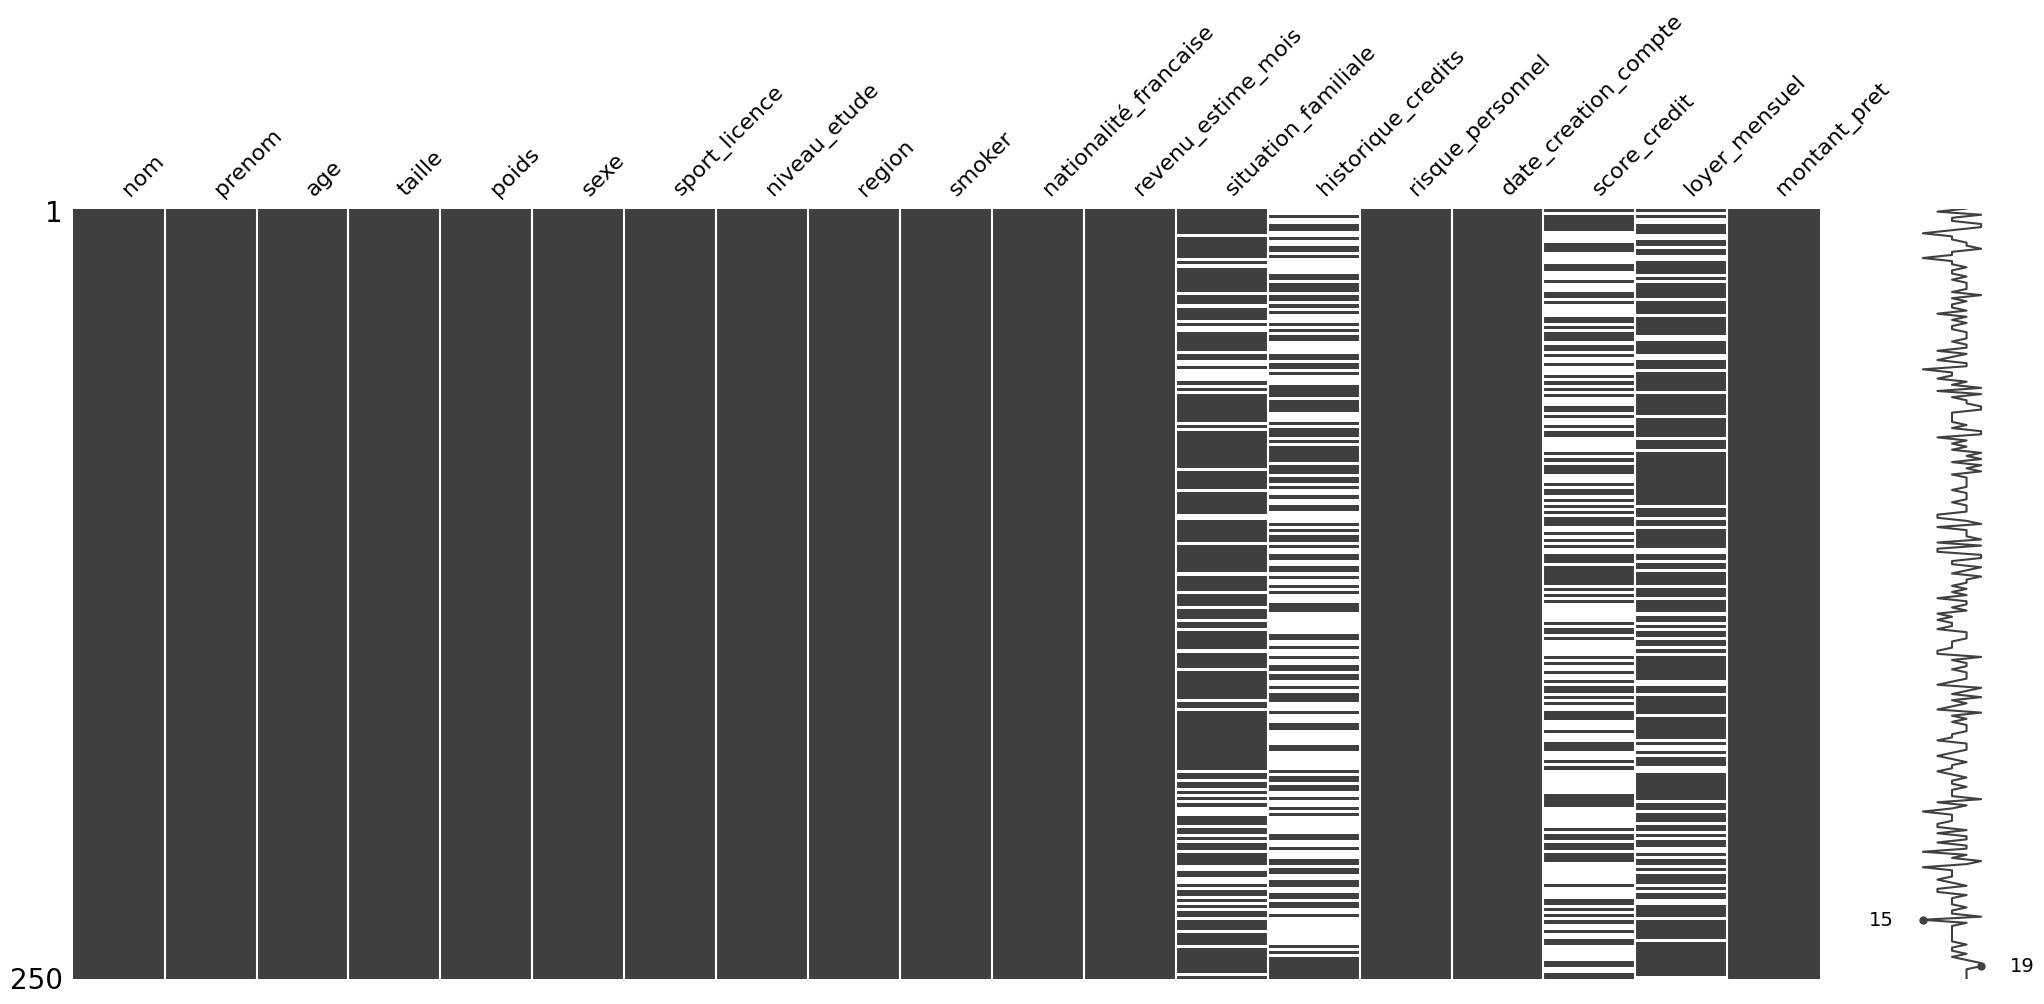

In [8]:
import pandas as pd
from os.path import join as join
collisions = pd.read_csv(join('data', "data-all-68482f115ac04033078508.csv"))
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

In [2]:
collisions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nom                    10000 non-null  object 
 1   prenom                 10000 non-null  object 
 2   age                    10000 non-null  int64  
 3   taille                 10000 non-null  float64
 4   poids                  10000 non-null  float64
 5   sexe                   10000 non-null  object 
 6   sport_licence          10000 non-null  object 
 7   niveau_etude           10000 non-null  object 
 8   region                 10000 non-null  object 
 9   smoker                 10000 non-null  object 
 10  nationalité_francaise  10000 non-null  object 
 11  revenu_estime_mois     10000 non-null  int64  
 12  situation_familiale    7648 non-null   object 
 13  historique_credits     4707 non-null   float64
 14  risque_personnel       10000 non-null  float64
 15  dat

## analyse :
historique_credits et score_credit sont trop vides pour être utiles.
situation_familiale et loyer_mensuel doivent etre rempli


      

In [3]:
collisions.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.000000,10000.000000,10000.000000,4707.000000,10000.000000,4694.000000,7094.00000,10000.000000
mean,46.516500,170.003760,70.064080,2520.996200,2.543446,0.499094,573.495952,5175.89104,9149.762575
std,16.832845,10.006542,15.014911,1157.532502,1.691198,0.290107,159.140639,3750.61004,10785.937404
min,18.000000,119.200000,10.500000,500.000000,0.000000,0.000000,300.000000,-395.25000,500.000000
25%,32.000000,163.200000,59.800000,1683.000000,1.000000,0.240000,437.000000,985.76750,500.000000
50%,46.000000,170.100000,70.200000,2480.000000,3.000000,0.500000,574.000000,5000.00000,3600.605667
75%,61.000000,176.800000,80.300000,3304.000000,4.000000,0.750000,712.000000,10000.00000,16245.534725
max,75.000000,209.800000,145.200000,6826.000000,5.000000,1.000000,849.000000,10000.00000,53192.053509


# Action sur le dataset : 


## Nettoyage et remplissage des colonnes

 ### On rempli les colonnes manquantes avec la moyenne ou avec la mod

In [9]:
 ### on rempli loyer mensuel avec la moyenne 
collisions['loyer_mensuel'] = collisions['loyer_mensuel'].fillna(collisions['loyer_mensuel'].mean())
collisions['situation_familiale'] = collisions['situation_familiale'].fillna(collisions['situation_familiale'].mode()[0])

## On filtres les outliers : poids incohérent ou loyer négatif

In [10]:
### filter outlers values
collisions = collisions[(collisions['poids'] > 30) & (collisions['loyer_mensuel'] > 0)]

### On vire car trop peu de données

In [11]:

collisions.drop(columns=['score_credit'], inplace=True, errors='ignore')
collisions.drop(columns=['historique_credits'], inplace=True, errors='ignore')

## Définition des colonnes numériques / categorielles
on défini les colonnes numériques et catégorielles pour les entrainnements de modèles

In [12]:
numerical_cols = ["age", "taille", "poids", "revenu_estime_mois", "risque_personnel", "loyer_mensuel"]    
# Ajout situation familiales
categorical_cols = ["sport_licence", "niveau_etude", "region", "smoker", "situation_familiale"]

Encodage des données catégorielles

In [13]:
collisions_encoded = pd.get_dummies(collisions, columns=categorical_cols, drop_first=True)
collisions_encoded.head()

,nom,prenom,age,taille,poids,sexe,nationalité_francaise,revenu_estime_mois,risque_personnel,date_creation_compte,...,region_Corse,region_Hauts-de-France,region_Normandie,region_Occitanie,region_Provence-Alpes-Côte d’Azur,region_Île-de-France,smoker_oui,situation_familiale_divorcé,situation_familiale_marié,situation_familiale_veuf
0,Ramirez,Casey,73,161.1,67.3,H,oui,857,0.11,2024-09-28,...,False,False,False,True,False,False,False,False,False,False
1,Hill,Phillip,44,168.2,74.9,H,oui,5245,0.79,2023-06-26,...,False,False,False,False,False,True,False,False,False,False
2,Hernandez,Martin,71,160.3,45.5,H,oui,3792,0.13,2023-06-13,...,False,False,False,False,False,False,True,False,False,False
3,Miller,Michael,62,161.9,87.7,F,oui,3291,0.32,2024-01-12,...,False,False,False,False,False,False,True,True,False,False
4,Walker,Matthew,18,178.0,77.6,F,oui,3893,0.66,2023-02-16,...,True,False,False,False,False,False,False,False,False,False


### Standardisation des variables numériques
On applique une standardisation (moyenne 0, écart-type 1) sur les colonnes numériques pour préparer les données à l'entraînement des modèles.

In [14]:
# Standardisation des colonnes numériques (moyenne 0, écart-type 1)
collisions_encoded[numerical_cols] = (collisions_encoded[numerical_cols] - collisions_encoded[numerical_cols].mean()) / collisions_encoded[numerical_cols].std()
collisions_encoded[numerical_cols].head()

,age,taille,poids,revenu_estime_mois,risque_personnel,loyer_mensuel
0,1.573777,-0.888651,-0.198892,-1.438823,-1.340421,-1.207267
1,-0.149261,-0.179917,0.315542,2.353718,1.003988,1.526191
2,1.454947,-0.968508,-1.674506,1.097892,-1.271468,-0.058968
3,0.920211,-0.808794,1.181957,0.664879,-0.616412,1.526191
4,-1.694053,0.798336,0.498301,1.185187,0.555792,-0.003205


 ### On vire car pas RGPD et pas éthique
Nom et prénon, c'est NON !

In [8]:
collisions.drop(columns=['nom'], inplace=True, errors='ignore')
collisions.drop(columns=['prenom'], inplace=True, errors='ignore')

 ### On vire car pas éthique
 influence du sexe et de la nationalité sont discréminants

In [4]:
collisions.drop(columns=['sexe'], inplace=True, errors='ignore')
collisions.drop(columns=['nationalité_francaise'], inplace=True, errors='ignore')

### On supprime les colonnes qui ne font pas sens ou qui peuvent permettre de reconstruire une identité (Attaque de reconstruction)

In [11]:
collisions.drop(columns=['date_creation_compte'], inplace=True, errors='ignore')

# Dataset Final

In [15]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9946 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nom                    9946 non-null   object 
 1   prenom                 9946 non-null   object 
 2   age                    9946 non-null   int64  
 3   taille                 9946 non-null   float64
 4   poids                  9946 non-null   float64
 5   sexe                   9946 non-null   object 
 6   sport_licence          9946 non-null   object 
 7   niveau_etude           9946 non-null   object 
 8   region                 9946 non-null   object 
 9   smoker                 9946 non-null   object 
 10  nationalité_francaise  9946 non-null   object 
 11  revenu_estime_mois     9946 non-null   int64  
 12  situation_familiale    9946 non-null   object 
 13  risque_personnel       9946 non-null   float64
 14  date_creation_compte   9946 non-null   object 
 15  loyer_men

In [16]:
# Sauvegarde du dataset nettoyé
collisions.to_csv(join('data', 'df_data_all_cleaned_02.csv'), index=False)